In [15]:
source("R/simulation.R")
source("R/deconvolution.R")

Loading required package: pkgmaker

Loading required package: registry

Warning message:
“package ‘registry’ was built under R version 3.5.2”
Loading required package: NMF

Loading required package: rngtools

Loading required package: cluster

NMF - BioConductor layer [OK] | Shared memory capabilities [OK] | Cores 15/16

Loading required package: csSAM

Loading required package: Rcpp

Loading required package: stringr

Warning message:
“package ‘stringr’ was built under R version 3.5.2”
Loading required package: GSEABase

Loading required package: annotate

Warning message:
“package ‘annotate’ was built under R version 3.5.2”
Loading required package: AnnotationDbi

Loading required package: stats4

Loading required package: IRanges

Loading required package: S4Vectors


Attaching package: ‘S4Vectors’


The following object is masked from ‘package:NMF’:

    nrun


The following object is masked from ‘package:pkgmaker’:

    new2


The following object is masked from ‘package:base’:

 

In [18]:
sim_noises <- seq(0, 6.5, by = 0.2)
df <- data.frame(matrix(ncol = length(sim_noises), nrow = 0))
colnames(df) <- sim_noises

In [19]:
r2s <- list()
simulation <- createSimulation(n_genes = 12000, n_samples = 40, n_cell_types = 4)
for (noise in sim_noises) {
    cnoise <- as.character(noise)
    r2s[cnoise] <- c()
    for (i in 1:100) {
        sim_with_noise <- withNoise(simulation, noise)
        r2s[[cnoise]] <- c(r2s[[cnoise]], sim_with_noise$noise_r2)
    }
}

In [20]:
r2_df <- data.frame(r2s)
r2_sds <- apply(r2_df, 2, sd)
r2_means <- apply(r2_df, 2, mean)
df <- data.frame(list(mean = r2_means, sd = r2_sds))
df$noise <- sim_noises

In [21]:
colnames(r2_df) <- sim_noises
r2_df_melt <- data.table::melt(r2_df, variable.name = "Noise", value.name = "R2")

Warning message in data.table::melt(r2_df, variable.name = "Noise", value.name = "R2"):
“The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(r2_df). In the next version, this warning will become an error.”
No id variables; using all as measure variables



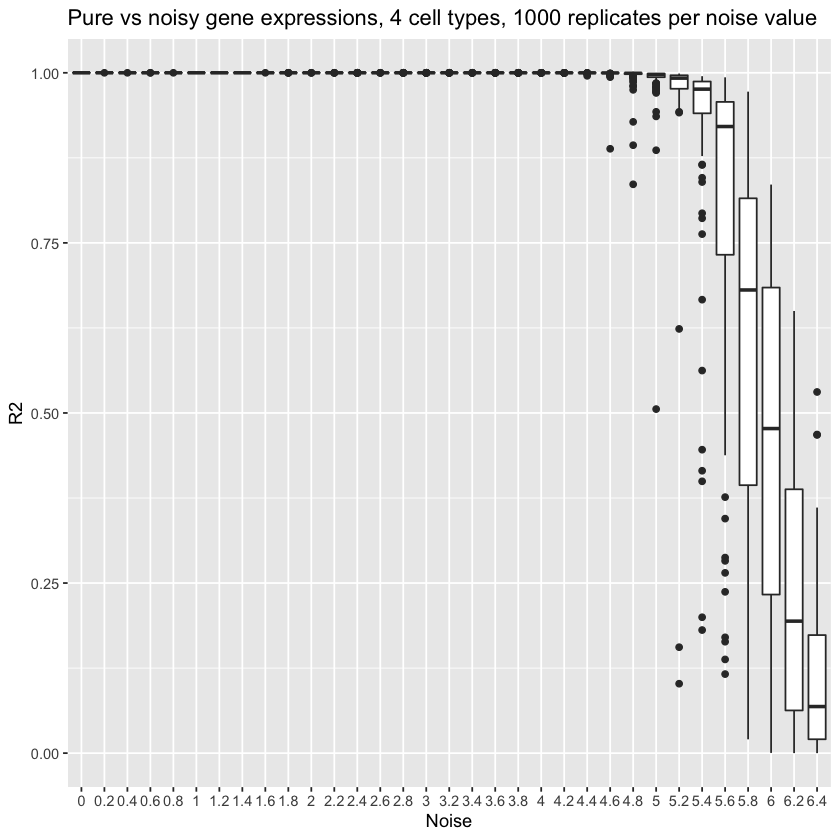

In [22]:
ggplot(r2_df_melt, aes(x=Noise, y=R2)) + geom_boxplot() +
    ggtitle("Pure vs noisy gene expressions, 4 cell types, 1000 replicates per noise value")

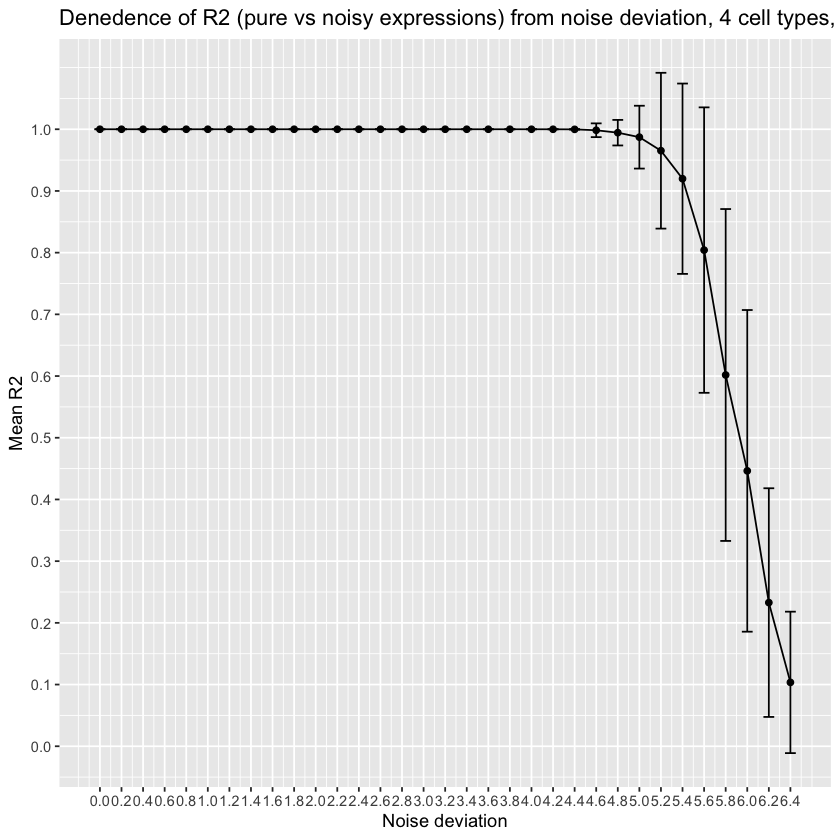

In [23]:
ggplot(df, aes(noise, mean)) +
    geom_line() +
    geom_point() +
    geom_errorbar(
        aes(
            ymin=mean-sd,
            ymax=mean+sd
        ),
        width=.1,
        position=position_dodge(0.01)
    ) +
    scale_x_continuous(breaks = sim_noises) +
    scale_y_continuous(breaks = seq(0, 1, by=0.1)) +
    ylab("Mean R2") +
    xlab("Noise deviation") +
    ggtitle("Denedence of R2 (pure vs noisy expressions) from noise deviation, 4 cell types, 1000 replicates per point")